In [2]:
!pip install wget

  Running setup.py bdist_wheel for wget ... done
  Stored in directory: /home/gauravk/.cache/pip/wheels/6d/98/29/61ccc41148f871009126c2e844e26f73eeb25e12cca92228a5
Successfully built wget


In [3]:
import wget

In [12]:
# wget.download("https://cdn.hackerrank.com/contests/gs_quantify_2017/gcPredictionFile.csv")
!ls

a0409a00-8-dataset_dp  gcPredictionFile.csv  gcTrianingSet.csv	Untitled.ipynb


In [13]:
import pandas as pd
import numpy as np

In [14]:
train = pd.read_csv("gcTrianingSet.csv")
test = pd.read_csv("gcPredictionFile.csv")

In [19]:
print(train.shape)
train.columns

(2730, 13)


Index(['initialUsedMemory', 'initialFreeMemory', 'query token', 'gcRun',
       'gcInitialMemory', 'gcFinalMemory', 'gcTotalMemory', 'userTime',
       'sysTime', 'realTime', 'cpuTimeTaken', 'finalUsedMemory',
       'finalFreeMemory'],
      dtype='object')

In [40]:
train["initialMemoryRatio"] = train["initialFreeMemory"]/train["initialUsedMemory"]
# train.drop(train.columns[7], axis=1, inplace=True)
# train.drop(train.columns[7], axis=1, inplace=True)
train.head()

,initialUsedMemory,initialFreeMemory,query token,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,cpuTimeTaken,finalUsedMemory,finalFreeMemory,initialMemoryRatio
0,4.249634,2.999878,token_1,False,0.0,0.0,0.0,0.371230,4.409714,2.839798,0.705914
1,4.409720,2.839792,token_2,False,0.0,0.0,0.0,0.220883,4.482361,2.767151,0.643985
2,4.482361,2.767151,token_3,False,0.0,0.0,0.0,0.141776,4.542626,2.706886,0.617342
3,4.542626,2.706886,token_4,False,0.0,0.0,0.0,0.156459,4.616293,2.633218,0.595886
4,4.616296,2.633216,token_5,False,0.0,0.0,0.0,0.285218,4.787172,2.462339,0.570418


In [51]:
tokens = train[train.columns[2]].unique()
tokens

array(['token_1', 'token_2', 'token_3', 'token_4', 'token_5', 'token_6',
       'token_7', 'token_8', 'token_9', 'token_10', 'token_11', 'token_12',
       'token_13', 'token_14', 'token_15', 'token_16', 'token_17',
       'token_18', 'token_19', 'token_20', 'token_21', 'token_22',
       'token_23', 'token_24', 'token_25', 'token_26', 'token_27',
       'token_28', 'token_29', 'token_30', 'token_31', 'token_32',
       'token_33', 'token_34', 'token_35', 'token_36', 'token_37',
       'token_38', 'token_39', 'token_40', 'token_41', 'token_42',
       'token_43', 'token_44', 'token_45', 'token_46', 'token_47',
       'token_48', 'token_49', 'token_50', 'token_51', 'token_52',
       'token_53', 'token_54', 'token_55', 'token_56', 'token_57',
       'token_58', 'token_59', 'token_60', 'token_61', 'token_62',
       'token_63', 'token_64', 'token_65', 'token_66', 'token_67',
       'token_68', 'token_69', 'token_70', 'token_71', 'token_72',
       'token_73', 'token_74', 'token_75', 'tok

In [62]:
newdf = []
n_true = []
for i in tokens:
    tempdf = train[train[train.columns[2]]==i]
    n_true.append(tempdf[tempdf["gcRun"]==True].shape[0])
    newdf.append(tempdf[tempdf["gcRun"]==True].initialMemoryRatio.mean())

# n_true

In [64]:
for i, j, k in zip(tokens, n_true, newdf):
    print(i, j, k)

token_1 2 0.18873890507315105
token_2 3 0.09593441894308434
token_3 0 nan
token_4 3 0.16839041511219513
token_5 1 0.09602004232407982
token_6 0 nan
token_7 1 0.07259591725466188
token_8 5 0.18498598823098944
token_9 6 0.13855432265576928
token_10 2 0.26360096117483706
token_11 1 0.19725668282125886
token_12 0 nan
token_13 2 0.3526264379647339
token_14 1 0.09738020129049219
token_15 8 0.1756643564554345
token_16 0 nan
token_17 1 0.06441511288441183
token_18 2 0.09968236834894968
token_19 3 0.2136834735063158
token_20 1 0.14343963417168565
token_21 1 0.06023204124769451
token_22 1 0.13444927955335853
token_23 10 0.22198838522887998
token_24 3 0.15438537962426413
token_25 0 nan
token_26 0 nan
token_27 1 0.09702635216593711
token_28 1 0.049477155739697486
token_29 1 0.05978342084039138
token_30 3 0.2487736978185958
token_31 2 0.16164588768349752
token_32 2 0.0604910164565477
token_33 4 0.15257141698777918
token_34 0 nan
token_35 0 nan
token_36 3 0.1431072143717337
token_37 1 0.086711754514

In [70]:
newdf = pd.DataFrame({"token":tokens, "n_true":n_true, "meanRatio":newdf})

In [74]:
newdf.fillna(value=0, inplace=True)

In [85]:
newdf.sort_values("meanRatio").reset_index()

,index,meanRatio,n_true,token
0,45,0.000000,0,token_46
1,33,0.000000,0,token_34
2,34,0.000000,0,token_35
3,89,0.000000,0,token_90
4,50,0.000000,0,token_51
5,51,0.000000,0,token_52
6,56,0.000000,0,token_57
7,58,0.000000,0,token_59
8,59,0.000000,0,token_60
9,25,0.000000,0,token_26


In [77]:
%matplotlib inline

In [96]:
def token_threshold(x):
    return newdf[newdf["token"] == x].iloc[0,0]
token_threshold("token_1")

0.18873890507315105

In [97]:
train["threshold"] = train["query token"].apply(lambda x: token_threshold(x))

In [99]:
train.drop(train.columns[2], axis=1, inplace=True)

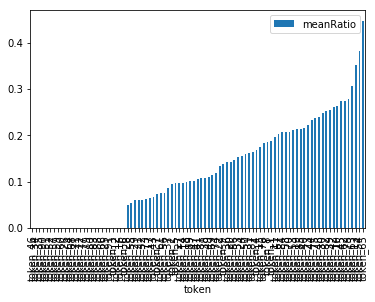

In [86]:
newdf.sort_values("meanRatio").reset_index().plot(x="token", y="meanRatio", kind='bar')

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
from sklearn.model_selection import train_test_split

In [141]:
X = list(set(train.columns) - set(['gcRun','gcFinalMemory',

                                   'gcInitialMemory',
 'gcTotalMemory']))
y = ['gcRun']

In [142]:
X

['initialFreeMemory',
 'finalFreeMemory',
 'initialMemoryRatio',
 'finalUsedMemory',
 'cpuTimeTaken',
 'threshold',
 'initialUsedMemory']

In [172]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, random_state=42, shuffle=True)
skf.get_n_splits(train[X], train[y])
  


2

In [173]:
data = train[X]
op = train[y]
for train_index, test_index in skf.split(data, op.values.reshape((op.shape[0],))):
    print("*"*10)
    print("New Iteration: \n")
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = op.iloc[train_index], op.iloc[test_index]
    rfc.fit(X_train, y_train)
    print("Score: ", accuracy_score(rfc.predict(X_test), y_test))
    temp = pd.DataFrame({'col':data.columns, 'importance':rfc.feature_importances_})
    print(temp.transpose())

**********
New Iteration: 

Score:  0.997071742313
                            0                1                   2  \
col         initialFreeMemory  finalFreeMemory  initialMemoryRatio   
importance           0.180013         0.317503            0.136782   

                          3             4          5                  6  
col         finalUsedMemory  cpuTimeTaken  threshold  initialUsedMemory  
importance         0.162341     0.0654047  0.0202179           0.117739  
**********
New Iteration: 



/home/gauravk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/gauravk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.995601173021
                            0                1                   2  \
col         initialFreeMemory  finalFreeMemory  initialMemoryRatio   
importance           0.224575         0.272714           0.0585762   

                          3             4          5                  6  
col         finalUsedMemory  cpuTimeTaken  threshold  initialUsedMemory  
importance         0.146896     0.0529222  0.0414429           0.202874  


In [143]:
X_train, X_test, y_train, y_test = train_test_split(train[X], train[y].values, random_state=42, test_size=0.3)

In [144]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print(y_train.shape)

(1911, 1)


/home/gauravk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [145]:
from sklearn.metrics import accuracy_score

In [146]:
intc = 0
for i in y_test:
    if i==True:
        intc+=1
        

In [147]:
intc

54

In [148]:
train[y]["gcRun"].value_counts()

False    2559
True      171
Name: gcRun, dtype: int64

In [149]:
accuracy_score(rfc.predict(X_test), y_test)

0.99511599511599513

In [123]:
rfc.feature_importances_

array([ 0.        ,  0.27957075,  0.        ,  0.02042925,  0.        ,
        0.        ,  0.4       ,  0.3       ,  0.        ,  0.        ])

In [136]:
train[X].columns

Index(['initialFreeMemory', 'gcFinalMemory', 'initialMemoryRatio',
       'finalUsedMemory', 'initialUsedMemory', 'finalFreeMemory',
       'gcInitialMemory', 'gcTotalMemory', 'cpuTimeTaken', 'threshold'],
      dtype='object')

In [189]:
train = train[umns]

In [190]:
train

,initialUsedMemory,initialFreeMemory,finalUsedMemory,finalFreeMemory,gcRun,gcInitialMemory,gcFinalMemory,gcTotalMemory,cpuTimeTaken,initialMemoryRatio,threshold
0,4.249634,2.999878,4.409714,2.839798,False,0.000000,0.000000,0.000000,0.371230,0.705914,0.188739
1,4.409720,2.839792,4.482361,2.767151,False,0.000000,0.000000,0.000000,0.220883,0.643985,0.095934
2,4.482361,2.767151,4.542626,2.706886,False,0.000000,0.000000,0.000000,0.141776,0.617342,0.000000
3,4.542626,2.706886,4.616293,2.633218,False,0.000000,0.000000,0.000000,0.156459,0.595886,0.168390
4,4.616296,2.633216,4.787172,2.462339,False,0.000000,0.000000,0.000000,0.285218,0.570418,0.096020
5,4.787174,2.462337,4.902623,2.346889,False,0.000000,0.000000,0.000000,0.170063,0.514361,0.000000
6,4.902623,2.346889,4.977153,2.272359,False,0.000000,0.000000,0.000000,0.164785,0.478701,0.072596
7,4.977155,2.272357,4.168083,3.081428,True,5.055250,4.142316,7.249512,0.154474,0.456557,0.184986
8,4.171586,3.077926,4.520573,2.728938,False,0.000000,0.000000,0.000000,0.457611,0.737831,0.138554
9,4.523625,2.725887,4.621179,2.628333,False,0.000000,0.000000,0.000000,0.182251,0.602589,0.263601


In [188]:
umns = ['initialUsedMemory', 'initialFreeMemory',  'finalUsedMemory',
       'finalFreeMemory', 'gcRun', 'gcInitialMemory',
       'gcFinalMemory', 'gcTotalMemory', 'cpuTimeTaken','initialMemoryRatio', 'threshold']